# Recurrent Neural Network

### Definition
A type of neural network designed to recognise patterns in sequential data by allowing information to be stored in 'memory.' Because it posseses internal memory; capable of remembering its past inputs, it is the prefered model for sequential data because it has internal memory, e.g area of application, *time-series, speech, text, weather audio and video* data.

* **When do you need it RNN?** 
    *“Whenever there is a sequence of data and that temporal dynamics that connects the data is more important than the spatial content of each individual frame.”- Lex Fridman (MIT)*

### How they work
* #### Feed-forward neural network: 
    * Information only moves forward; information never touches a node twice.
    * Have no memory of the input they received previously and are therefore  
      bad in predicting what’s coming next.
    * Can’t remember anything about what happened in the past, except their 
      training.
    * Map one input to   
* #### Recurrent Neural Network
    * Information **cycles through a loop**. When it makes a decision, it takes 
      into consideration the current input and also what it has learned from 
      the inputs it received previously.
    * Has short-term memory, but with **LSTM** they also have long-term 
      memory.
    * Has two inputs, present and past: apply weights to the current and also 
      to the previous input.
    * Can map one to many, many to one (clasifying a voice), many to many
    * You can view a RNN as a sequence of Neural Networks that you train one after another with backpropagation.
    
<img src="../_images/RNN.png" alt="RNN" width="700"/>

### Backpropagation Through Time
* **Backpropagation**
Going backwards through your the network to find the partial derivatives of the error with respect to the weights; enabling you to subtract this value from the weights. Those derivatives are then used by Gradient Descent, an to iteratively minimize a given loss function. Then it adjusts the weights up or down, depending on which decreases the error. That is exactly 

* **Backpropagation Through Time (BPTT)**
Backpropagation on an unrolled Recurrent Neural Network. Unrolling/unfolding is a visualization and conceptual tool, which helps you to understand what’s going on within the network. Since the error of a given timestep depends on the previous timestep, the error is back-propagated from the last to the first timestep, while unrolling all the timesteps. This allows calculating the error for each timestep, which allows updating the weights. Note that BPTT can be computationally expensive when you have a high number of timesteps

### Common issues:
* **Exploding gradients**
when the algorithm assigns a stupidly high importance to the weights, but can be solve if you truncate/squash the gradients

* **Vanishing gradients**
when the values of a gradient are too small causing the model to stop learning or takes way too long to converge. LSTM is a workaround this problem.

<img src="../_images/unfold.png" alt="unfold" width="700"/>

### Long short term memory
* An extension for recurrent neural networks, which basically extends their memory.
* Well suited to learn from important experiences that have very long time lags in between.
* Enables the RNN to remember their inputs over a long period of time.
* Contain their information in a memory, that is much like the memory of a computer because the LSTM can read, write and delete information from its memory.
* Have three analog gates: 
    * **input gate**: determine whether or not to let new input in
    * **forget gate**: determine wheteher or not to delete the irrelvant information
    * **output gate**: determine whether or not to impact the output at the current time step
* The gates are analog in the form of sigmoids (range from 0 to 1)
* Vanishing gradients is solved through LSTM because it keeps the gradients steep enough and therefore the training relatively short and the accuracy high.

<img src="../_images/LSTM.png" alt="LSTM" width="700"/>

Read more: [skymind.ai](https://skymind.ai/wiki/lstm), [medium.com](https://medium.com/explore-artificial-intelligence/an-introduction-to-recurrent-neural-networks-72c97bf0912), [wildML](www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/), [colah.github.io](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

## Code example
Predicting Google's stock price level

In [1]:
# LSTM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


### Data Pre-processing

In [2]:
dataset_train = pd.read_csv('../_data/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# scale features
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print('Dataset dimension: ', dataset_train.shape)
dataset_train.head()

Dataset dimension:  (1258, 6)


Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800

### Building the model

In [3]:
# initialising the RNN
regressor = Sequential()

# first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,
                return_sequences = True,
                input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,
                return_sequences = True))
regressor.add(Dropout(0.2))

# third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,
                return_sequences = True))
regressor.add(Dropout(0.2))

# fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# output layer
regressor.add(Dense(units = 1))

# compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0519
Epoch 2/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0059
Epoch 3/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0060
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0055
Epoch 5/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0040
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 10/

### Result & Visualisation

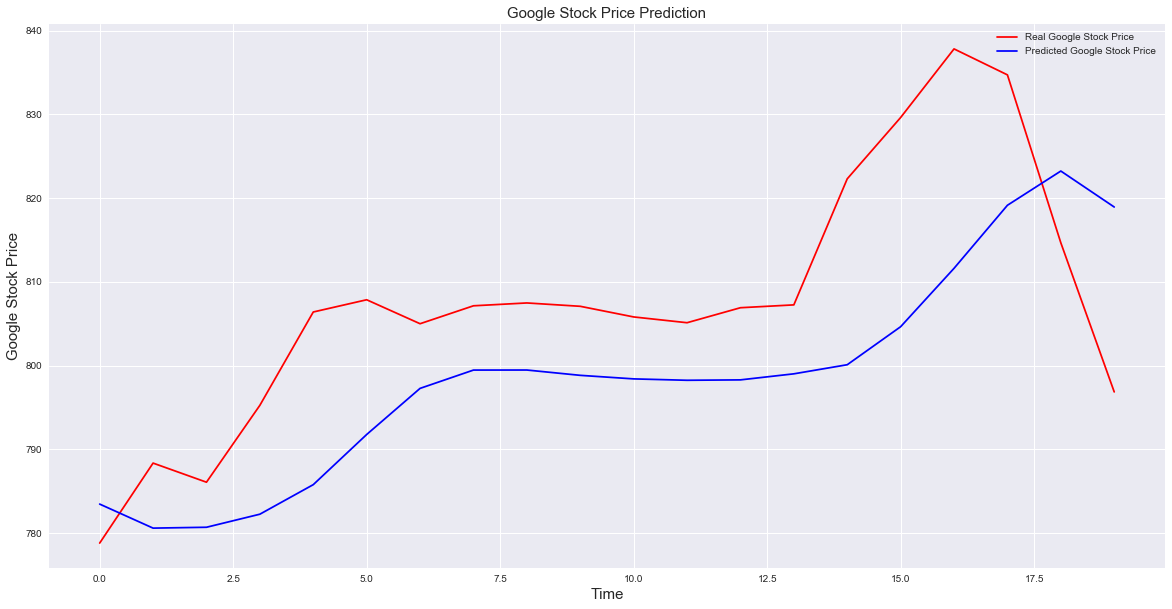

In [7]:
# uploading the real stock price of 2017
dataset_test = pd.read_csv('../_data/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# comparing the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
import matplotlib.pylab as pylab
plt.style.use('seaborn')
pylab.rcParams['figure.figsize'] = (20, 10)
pylab.rcParams['font.size'] = 24

plt.plot(real_stock_price, color = 'red',
        label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue',
        label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction', fontsize = 15)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Google Stock Price', fontsize = 15)
plt.legend()
plt.show()